# Pandas Fundamentals

*This material is adapted from the [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html), from Ryan Abernathey (Columbia University)*.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
# %config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode

## Pandas Data Structures: Series

A `Series` represents a one-dimensional array of data. The main difference between a `Series` and `numpy array` is that a `Series` has an _index_. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few.

In [11]:
names = ['Yasi', 'Debbie', 'Yasa']
values = [5., 4., 5.]
cyclones = pd.Series(values, index=names)
cyclones

Yasi      5.0
Debbie    4.0
Yasa      5.0
dtype: float64

Series have built in plotting methods.

<AxesSubplot:>

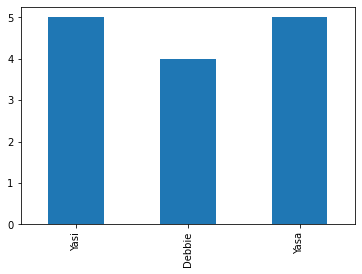

In [12]:
cyclones.plot(kind='bar')

Arithmetic operations and most numpy function can be applied to Series.
An important point is that the Series keep their index during such operations.

In [13]:
np.log(cyclones) / cyclones**2

Yasi      0.064378
Debbie    0.086643
Yasa      0.064378
dtype: float64

We can access the underlying index object if we need to:

In [14]:
cyclones.index

Index(['Yasi', 'Debbie', 'Yasa'], dtype='object')

### Indexing

We can get values back out using the index via the `.loc` attribute

In [15]:
cyclones.loc['Debbie']

4.0

Or by raw position using `.iloc`

In [16]:
cyclones.iloc[1]

4.0

We can pass a list or array to loc to get multiple rows back:

In [17]:
cyclones.loc[['Debbie', 'Yasa']]

Debbie    4.0
Yasa      5.0
dtype: float64

And we can even use slice notation

In [21]:
cyclones.loc['Debbie':'Yasa']

Debbie    4.0
Yasa      5.0
dtype: float64

In [20]:
cyclones.iloc[:2]

Yasi      5.0
Debbie    4.0
dtype: float64

If we need to, we can always get the raw data back out as well

In [22]:
cyclones.values # a numpy array

array([5., 4., 5.])

In [23]:
cyclones.index # a pandas Index object

Index(['Yasi', 'Debbie', 'Yasa'], dtype='object')

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single "column". A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

Below we create a DataFrame.

In [24]:
# first we create a dictionary
data = {'category': [5, 4, 5],
        'windspeed': [250., 215., 260.],
        'fatalities': [1, 14, 4]}
df = pd.DataFrame(data, index=['Yasi', 'Debbie', 'Yasa'])
df

category  windspeed  fatalities
Yasi           5      250.0           1
Debbie         4      215.0          14
Yasa           5      260.0           4

Pandas handles missing data very elegantly, keeping track of it through all calculations.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Yasi to Yasa
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    3 non-null      int64  
 1   windspeed   3 non-null      float64
 2   fatalities  3 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 96.0+ bytes


A wide range of statistical functions are available on both Series and DataFrames.

In [26]:
df.min()

category        4.0
windspeed     215.0
fatalities      1.0
dtype: float64

In [27]:
df.mean()

category        4.666667
windspeed     241.666667
fatalities      6.333333
dtype: float64

In [28]:
df.std()

category       0.577350
windspeed     23.629078
fatalities     6.806859
dtype: float64

In [29]:
df.describe()

category   windspeed  fatalities
count  3.000000    3.000000    3.000000
mean   4.666667  241.666667    6.333333
std    0.577350   23.629078    6.806859
min    4.000000  215.000000    1.000000
25%    4.500000  232.500000    2.500000
50%    5.000000  250.000000    4.000000
75%    5.000000  255.000000    9.000000
max    5.000000  260.000000   14.000000

We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [30]:
df['windspeed']

Yasi      250.0
Debbie    215.0
Yasa      260.0
Name: windspeed, dtype: float64

...or using attribute syntax.

In [31]:
df.windspeed

Yasi      250.0
Debbie    215.0
Yasa      260.0
Name: windspeed, dtype: float64

Indexing works very similar to series

In [32]:
df.loc['Debbie']

category        4.0
windspeed     215.0
fatalities     14.0
Name: Debbie, dtype: float64

In [33]:
df.iloc[1]

category        4.0
windspeed     215.0
fatalities     14.0
Name: Debbie, dtype: float64

But we can also specify the column we want to access

In [34]:
df.loc['Debbie', 'fatalities']

14

In [35]:
df.iloc[:2, 2]

Yasi       1
Debbie    14
Name: fatalities, dtype: int64

If we make a calculation using columns from the DataFrame, it will keep the same index:

In [36]:
df.windspeed / df.category

Yasi      50.00
Debbie    53.75
Yasa      52.00
dtype: float64

Which we can easily add as another column to the DataFrame:

In [37]:
df['ratio'] = df.windspeed / df.category
df

category  windspeed  fatalities  ratio
Yasi           5      250.0           1  50.00
Debbie         4      215.0          14  53.75
Yasa           5      260.0           4  52.00

## Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [44]:
cyclone = pd.Series(['$246.7 M', None, '$2.73 B', '$3.6 B'],
                     index=['Yasa', 'Tino', 'Debbie', 'Yasi'],
                     name='cost')
cyclone

Yasa      $246.7 M
Tino          None
Debbie     $2.73 B
Yasi        $3.6 B
Name: cost, dtype: object

In [45]:
# returns a new DataFrame
df.join(cyclone)

category  windspeed  fatalities  ratio      cost
Yasi           5      250.0           1  50.00    $3.6 B
Debbie         4      215.0          14  53.75   $2.73 B
Yasa           5      260.0           4  52.00  $246.7 M

In [46]:
# returns a new DataFrame
df.join(cyclone, how='right')

category  windspeed  fatalities  ratio      cost
Yasa         5.0      260.0         4.0  52.00  $246.7 M
Tino         NaN        NaN         NaN    NaN      None
Debbie       4.0      215.0        14.0  53.75   $2.73 B
Yasi         5.0      250.0         1.0  50.00    $3.6 B

In [47]:
# returns a new DataFrame
cyc = df.reindex(['Yasa', 'Tino', 'Debbie', 'Yasi', 'Tracy'])
cyc

category  windspeed  fatalities  ratio
Yasa         5.0      260.0         4.0  52.00
Tino         NaN        NaN         NaN    NaN
Debbie       4.0      215.0        14.0  53.75
Yasi         5.0      250.0         1.0  50.00
Tracy        NaN        NaN         NaN    NaN

We can also index using a boolean series. This is very useful

In [50]:
huge = df[df.category > 4]
huge

category  windspeed  fatalities  ratio  is_tragic
Yasi         5      250.0           1   50.0       True
Yasa         5      260.0           4   52.0       True

In [51]:
df['is_huge'] = df.category > 4
df

category  windspeed  fatalities  ratio  is_tragic  is_huge
Yasi           5      250.0           1  50.00       True     True
Debbie         4      215.0          14  53.75       True    False
Yasa           5      260.0           4  52.00       True     True

### Modifying Values

We often want to modify values in a dataframe based on some rule. To modify values, we need to use `.loc` or `.iloc`

In [52]:
df.loc['Debbie', 'windspeed'] = 285
df.loc['Yasa', 'category'] += 1
df

category  windspeed  fatalities  ratio  is_tragic  is_huge
Yasi           5      250.0           1  50.00       True     True
Debbie         4      285.0          14  53.75       True    False
Yasa           6      260.0           4  52.00       True     True

## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in.

<AxesSubplot:xlabel='category', ylabel='windspeed'>

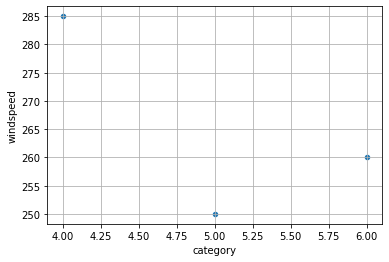

In [53]:
df.plot(kind='scatter', x='category', y='windspeed', grid=True)

<AxesSubplot:>

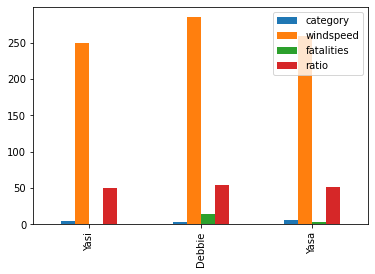

In [54]:
df.plot(kind='bar')

## Time Indexes

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great!

<AxesSubplot:>

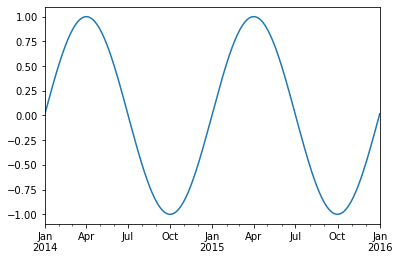

In [38]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

We can use python's slicing notation inside `.loc` to select a date range.

<AxesSubplot:>

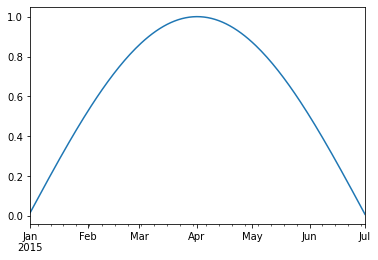

In [39]:
timeseries.loc['2015-01-01':'2015-07-01'].plot()

The TimeIndex object has lots of useful attributes

In [40]:
timeseries.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', length=731)

In [41]:
timeseries.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            23, 24, 25, 26, 27, 28, 29, 30, 31,  1],
           dtype='int64', length=731)

## Reading Data Files

In this example, we will use the eReefs Extraction tool from AIMS and look at **Davies Reef** which is located at 18.8S/147.6E.

The CSV file was downloaded from the [AIMS extraction tool](https://extraction.ereefs.aims.gov.au/extract-data) with the following settings:

- *Data collection*: GBR1 Hydro (Version 2) 
- *Variables*: Eastward wind speed (wspeed_u), Northward wind speed (wspeed_v), Northward current (v), Eastward current (u) 
- *Date range*: 2010-2021 
- *Time step*: hourly Depths: -2.35 m

Once the extraction request was submitted the dataset was created after an one hour of processing the data was available for download from [Extraction request: Example dataset: Wind-vs-Current at Davies and Myrmidon Reefs (2019)](https://extraction.ereefs.aims.gov.au/data/2009.c451dc3).

After download we have a file called `DaviesReef_timeseries.csv`.

:::{tip}
To read it into pandas, we will use the [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function. This function is incredibly complex and powerful. You can use it to extract data from almost any text file. However, you need to understand how to use its various options.
:::

With no options, this is what we get.

In [56]:
df = pd.read_csv('examples/DaviesReef_timeseries.csv')
df.head()

date current wind salinity temperature
0   2010-09-01 0.18839505 7.481102 35.47361 25.17717
1  2010-09-02 0.28618774 4.9959917 35.48525 25.26...
2  2010-09-03 0.29367417 6.024843 35.462696 25.20...
3  2010-09-04 0.28546846 5.7049136 35.44163 25.38...
4   2010-09-05 0.34016508 4.3658934 35.41293 25.7196

Pandas failed to identify the different columns. This is because it was expecting standard CSV (comma-separated values) file. In our file, instead, the values are separated by whitespace. And not a single whilespace--the amount of whitespace between values varies. We can tell pandas this using the `sep` keyword.

In [57]:
df = pd.read_csv('examples/DaviesReef_timeseries.csv', sep='\s+')
df.head()

date   current      wind   salinity  temperature
0  2010-09-01  0.188395  7.481102  35.473610    25.177170
1  2010-09-02  0.286188  4.995992  35.485250    25.262072
2  2010-09-03  0.293674  6.024843  35.462696    25.201515
3  2010-09-04  0.285468  5.704914  35.441630    25.385157
4  2010-09-05  0.340165  4.365893  35.412930    25.719600

Great! It worked. 

Often missing values are set either to -9999 or -99. Let's tell this to pandas by assigning nan to these specific values.

In [61]:
df = pd.read_csv('examples/DaviesReef_timeseries.csv', sep='\s+', na_values=[-9999.0, -99.0])
df.head()

date   current      wind   salinity  temperature
0  2010-09-01  0.188395  7.481102  35.473610    25.177170
1  2010-09-02  0.286188  4.995992  35.485250    25.262072
2  2010-09-03  0.293674  6.024843  35.462696    25.201515
3  2010-09-04  0.285468  5.704914  35.441630    25.385157
4  2010-09-05  0.340165  4.365893  35.412930    25.719600

Great. The missing data is now represented by `NaN`.

What data types did pandas infer?

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3815 non-null   object 
 1   current      3815 non-null   float64
 2   wind         3815 non-null   float64
 3   salinity     3815 non-null   float64
 4   temperature  3815 non-null   float64
dtypes: float64(4), object(1)
memory usage: 149.1+ KB


One problem here is that Pandas did not recognize the `date` column as a date. Let's help it.

In [63]:
df = pd.read_csv('examples/DaviesReef_timeseries.csv', sep='\s+',
                 na_values=[-9999.0, -99.0],
                 parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3815 non-null   datetime64[ns]
 1   current      3815 non-null   float64       
 2   wind         3815 non-null   float64       
 3   salinity     3815 non-null   float64       
 4   temperature  3815 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 149.1 KB


It worked! Finally, let's tell pandas to use the date column as the index.

In [64]:
df = df.set_index('date')
df.head()

current      wind   salinity  temperature
date                                                  
2010-09-01  0.188395  7.481102  35.473610    25.177170
2010-09-02  0.286188  4.995992  35.485250    25.262072
2010-09-03  0.293674  6.024843  35.462696    25.201515
2010-09-04  0.285468  5.704914  35.441630    25.385157
2010-09-05  0.340165  4.365893  35.412930    25.719600

We can now access values by time:

In [65]:
df.loc['2014-08-07']

current         0.381858
wind           11.198019
salinity       35.307660
temperature    23.866120
Name: 2014-08-07 00:00:00, dtype: float64

Or use slicing to get a range:

In [73]:
df2014 = df.loc['2014-01-01':'2014-12-31']
df2016 = df.loc['2016-01-01':'2016-12-31']
df2018 = df.loc['2018-01-01':'2018-12-31']
df2020 = df.loc['2020-01-01':'2020-12-31']
df2014

current      wind   salinity  temperature
date                                                  
2014-01-01  0.400576  5.939211  35.446510    28.987250
2014-01-02  0.382042  3.748479  35.437440    29.117306
2014-01-03  0.396745  4.321397  35.470460    29.362583
2014-01-04  0.438115  5.537916  35.474777    29.393948
2014-01-05  0.440387  5.804630  35.441086    29.072742
...              ...       ...        ...          ...
2014-12-27  0.229368  5.385712  35.412727    28.865137
2014-12-28  0.205974  3.610898  35.416306    29.263445
2014-12-29  0.303206  3.092528  35.432480    29.667050
2014-12-30  0.254966  2.479212  35.479332    30.116217
2014-12-31  0.285224  2.497501  35.500930    30.287010

[365 rows x 4 columns]

### Quick Statistics

In [74]:
df.describe()

current         wind     salinity  temperature
count  3815.000000  3815.000000  3815.000000  3815.000000
mean      0.265826     6.708479    35.182442    26.610127
std       0.084196     2.643628     0.292870     1.936466
min       0.061780     1.245048    32.956253    22.933332
25%       0.209833     4.613128    35.042687    24.853140
50%       0.256591     6.528472    35.263058    26.700006
75%       0.308909     8.581003    35.375860    28.180752
max       0.817050    18.900612    35.763687    31.598990

### Plotting Values

We can now quickly make plots of the data

<AxesSubplot:>

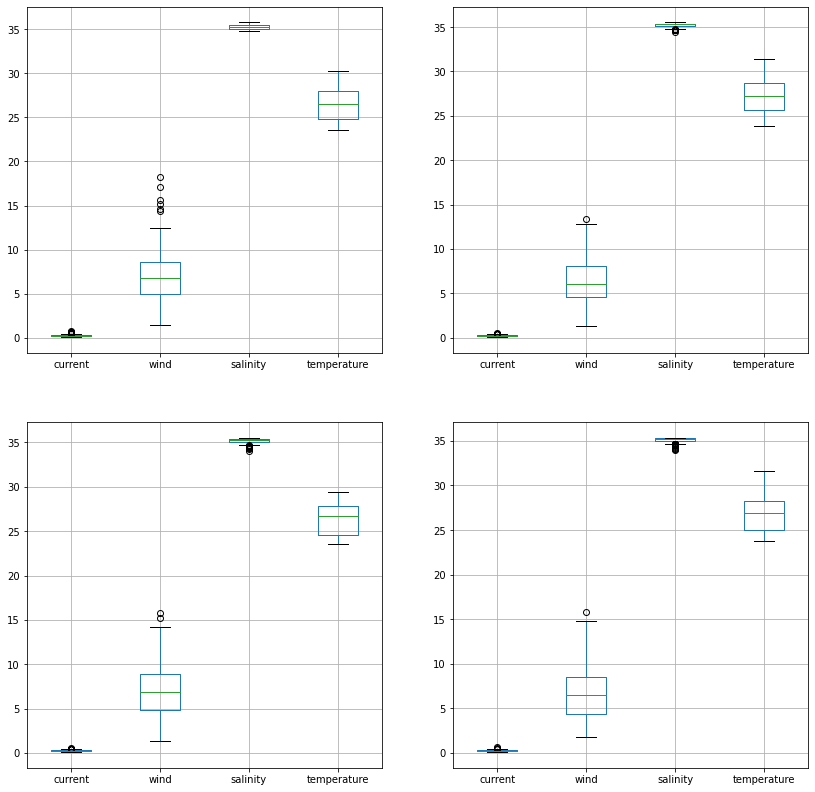

In [77]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(14,14))

df2014.iloc[:, :].boxplot(ax=ax[0,0])
df2016.iloc[:, :].boxplot(ax=ax[0,1])
df2018.iloc[:, :].boxplot(ax=ax[1,0])
df2020.iloc[:, :].boxplot(ax=ax[1,1])

Pandas is very "time aware":

<AxesSubplot:xlabel='date'>

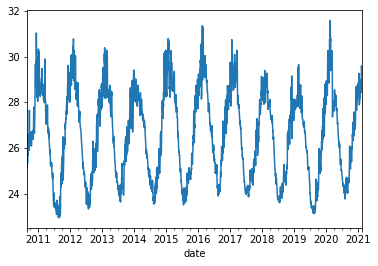

In [78]:
df.temperature.plot()

Note: we could also manually create an axis and plot into it.

Text(0.5, 1.0, 'Pandas Made This!')

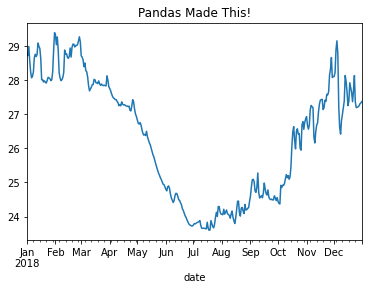

In [79]:
fig, ax = plt.subplots()
df2018.temperature.plot(ax=ax)
ax.set_title('Pandas Made This!')

<AxesSubplot:xlabel='date'>

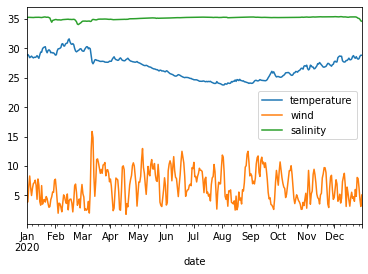

In [80]:
df2020[['temperature', 'wind', 'salinity']].plot()

### Resampling

Since pandas understands time, we can use it to do resampling.

In [81]:
# monthly reampler object
rs_obj = df.resample('MS')
rs_obj

In [82]:
rs_obj.mean()

current      wind   salinity  temperature
date                                                  
2010-09-01  0.281347  5.869099  35.365671    26.017173
2010-10-01  0.283938  8.118046  35.368278    26.372507
2010-11-01  0.268329  7.007014  35.384552    26.872662
2010-12-01  0.342128  5.501357  35.019846    29.165949
2011-01-01  0.306163  5.960649  34.620039    29.236425
...              ...       ...        ...          ...
2020-10-01  0.257407  6.045590  35.242590    25.873325
2020-11-01  0.268678  6.381081  35.325458    27.001825
2020-12-01  0.288298  5.469824  35.251699    28.221937
2021-01-01  0.289114  7.052687  34.391954    28.522526
2021-02-01  0.236967  3.992934  34.692678    29.264261

[126 rows x 4 columns]

We can chain all of that together

<AxesSubplot:xlabel='date'>

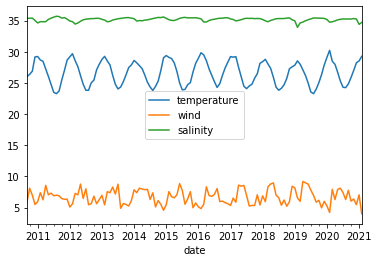

In [83]:
df_mm = df.resample('MS').mean()
df_mm[['temperature', 'wind', 'salinity']].plot()

Next notebook, we will dig deeper into resampling, rolling means, and grouping operations (groupby).